In [106]:
# !pip install pandas matplotlib scikit-learn duckdb -q

Libraries imported successfully.


In [140]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

%matplotlib inline
os.makedirs("fig", exist_ok=True)
print("Libraries imported successfully.")

Libraries imported successfully.


In [142]:
# Step 2: Load the dataset
df = pd.read_csv('CAvideos.csv', encoding='utf-8')
print("DataFrame loaded. Shape:", df.shape)
df.head()

DataFrame loaded. Shape: (40881, 16)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [144]:
# Step 3: Display basic info
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  de

,category_id,views,likes,dislikes,comment_count
count,40881.000000,4.088100e+04,4.088100e+04,4.088100e+04,4.088100e+04
mean,20.795553,1.147036e+06,3.958269e+04,2.009195e+03,5.042975e+03
std,6.775054,3.390913e+06,1.326895e+05,1.900837e+04,2.157902e+04
min,1.000000,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,1.439020e+05,2.191000e+03,9.900000e+01,4.170000e+02
50%,24.000000,3.712040e+05,8.780000e+03,3.030000e+02,1.301000e+03
75%,24.000000,9.633020e+05,2.871700e+04,9.500000e+02,3.713000e+03
max,43.000000,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06


In [146]:
# Step 4: Check for missing values and duplicates
print("Missing values per column:")
print(df.isnull().sum())

duplicate_count = df.duplicated().sum()
print("Duplicated rows:", duplicate_count)

if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicates removed. New shape:", df.shape)

df_clean = df.copy()

Missing values per column:
video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
dtype: int64
Duplicated rows: 0


In [154]:
# Step 5: Convert 'publish_time' and 'trending_date' to datetime
if 'publish_time' in df_clean.columns:
    df_clean['publish_time'] = pd.to_datetime(df_clean['publish_time'], errors='coerce')
    df_clean['publish_year'] = df_clean['publish_time'].dt.year
    df_clean['publish_month'] = df_clean['publish_time'].dt.month
    df_clean['publish_day'] = df_clean['publish_time'].dt.day
    display(df_clean[['publish_time', 'publish_year', 'publish_month', 'publish_day']].head())
else:
    print("'publish_time' column does not exist.")

df_clean['trending_date'] = pd.to_datetime(df_clean['trending_date'], errors='coerce')

,publish_time,publish_year,publish_month,publish_day
0,2017-11-10 17:00:03+00:00,2017,11,10
1,2017-11-13 17:00:00+00:00,2017,11,13
2,2017-11-12 19:05:24+00:00,2017,11,12
3,2017-11-12 18:01:41+00:00,2017,11,12
4,2017-11-09 11:04:14+00:00,2017,11,9


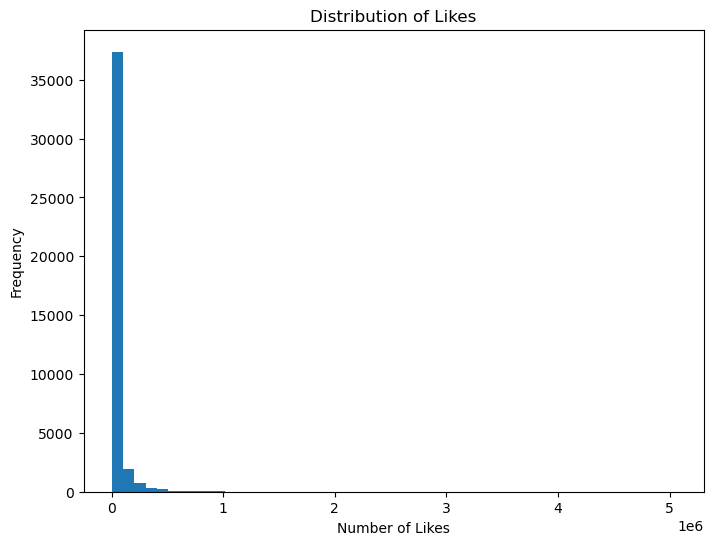

In [156]:
# Step 6: Histogram of 'likes'
plt.figure(figsize=(8,6))
plt.hist(df_clean['likes'], bins=50)
plt.title("Distribution of Likes")
plt.xlabel("Number of Likes")
plt.ylabel("Frequency")
plt.savefig("fig/likes_hist.png")
plt.show()

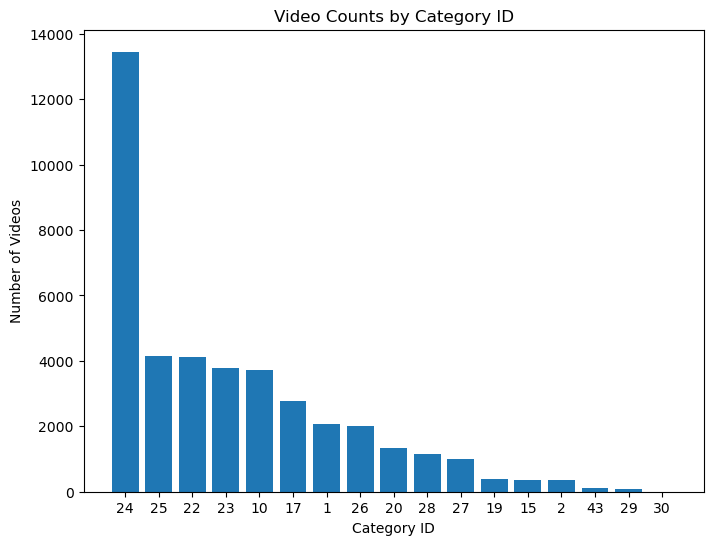

In [158]:
# Step 7: Bar chart of 'category_id'
if 'category_id' in df_clean.columns:
    category_counts = df_clean['category_id'].value_counts()
    plt.figure(figsize=(8,6))
    plt.bar(category_counts.index.astype(str), category_counts.values)
    plt.title("Video Counts by Category ID")
    plt.xlabel("Category ID")
    plt.ylabel("Number of Videos")
    plt.savefig("fig/category_bar.png")
    plt.show()
else:
    print("'category_id' column does not exist.")

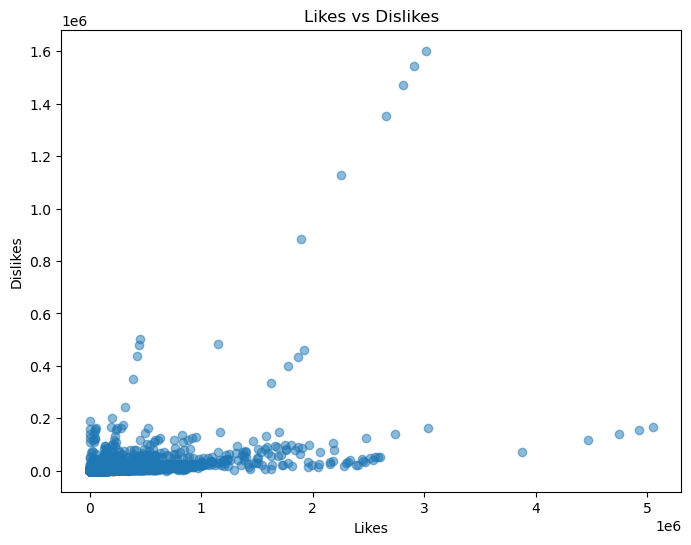

In [160]:
# Step 8: Scatter plot of 'likes' vs 'dislikes'
if 'likes' in df_clean.columns and 'dislikes' in df_clean.columns:
    plt.figure(figsize=(8,6))
    plt.scatter(df_clean['likes'], df_clean['dislikes'], alpha=0.5)
    plt.title("Likes vs Dislikes")
    plt.xlabel("Likes")
    plt.ylabel("Dislikes")
    plt.savefig("fig/likes_vs_dislikes.png")
    plt.show()
else:
    print("Required columns not found.")

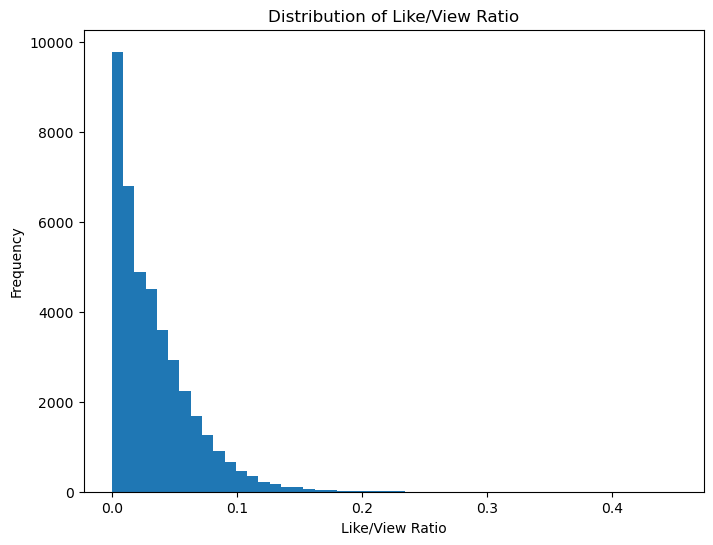

In [164]:
# Step 9: Engagement ratios
eps = 1e-6
df_clean['like_ratio'] = df_clean['likes'] / (df_clean['views'] + eps)
df_clean['dislike_ratio'] = df_clean['dislikes'] / (df_clean['views'] + eps)
df_clean['comment_ratio'] = df_clean['comment_count'] / (df_clean['views'] + eps)
df_clean['like_dis_ratio'] = (df_clean['likes'] + eps) / (df_clean['dislikes'] + eps)

plt.figure(figsize=(8,6))
plt.hist(df_clean['like_ratio'], bins=50)
plt.title("Distribution of Like/View Ratio")
plt.xlabel("Like/View Ratio")
plt.ylabel("Frequency")
plt.savefig("fig/like_ratio_hist.png")
plt.show()

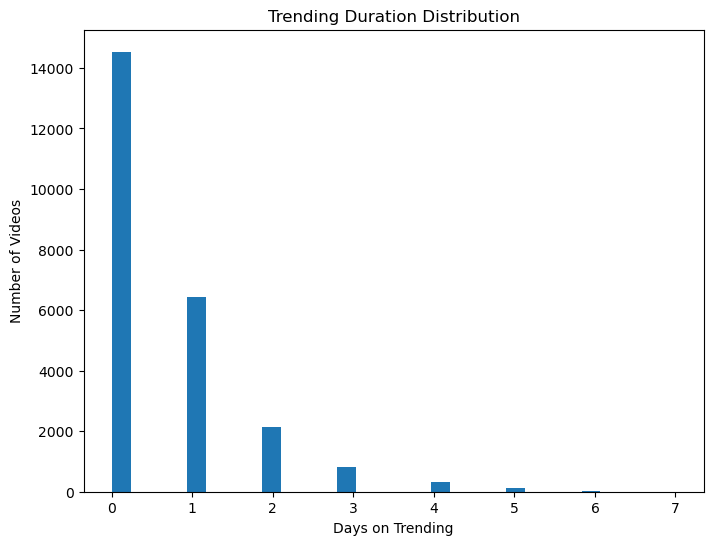

,video_id,days_on_trending
12499,VYOjWnS4cMY,7
8945,MEePYLF9Uzs,7
16013,doP7xKdGOKs,7
2993,6ZfuNTqbHE8,7
14240,_9YMpuLDnwo,6
1937,3tUCuMSPQwE,6
5521,DIBw9dSVKdU,6
9402,NWUg_1qV190,6
8606,LPTlvQ1Zet0,6
24040,yzshoDMBkqE,6


In [166]:
# Step 10: Trending duration
duration = df_clean.groupby('video_id')['trending_date'].nunique().reset_index(name='days_on_trending')

plt.figure(figsize=(8,6))
plt.hist(duration['days_on_trending'], bins=30)
plt.title("Trending Duration Distribution")
plt.xlabel("Days on Trending")
plt.ylabel("Number of Videos")
plt.savefig("fig/trending_duration_hist.png")
plt.show()

duration.sort_values('days_on_trending', ascending=False).head(10)

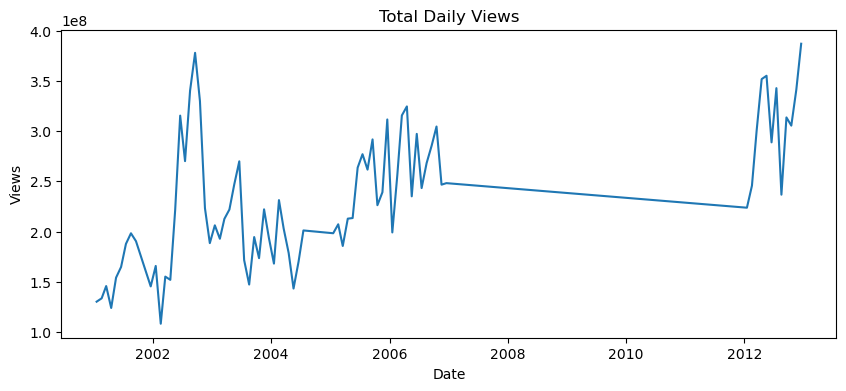

In [168]:
# Step 11: Daily total views
daily_views = df_clean.groupby('trending_date')['views'].sum()
plt.figure(figsize=(10,4))
plt.plot(daily_views.index, daily_views.values)
plt.title("Total Daily Views")
plt.xlabel("Date")
plt.ylabel("Views")
plt.savefig("fig/daily_views_trend.png")
plt.show()

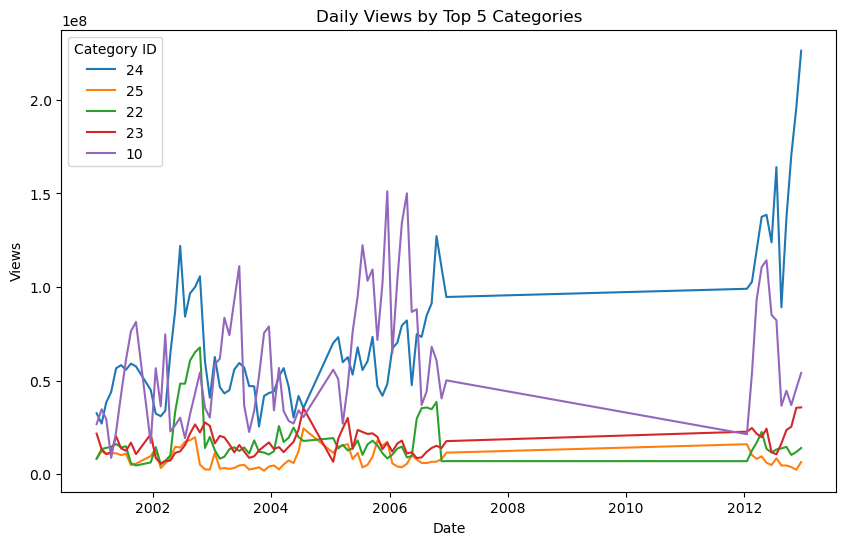

In [170]:
# Step 12: Views by Top 5 Categories
top5_cats = df_clean['category_id'].value_counts().head(5).index
plt.figure(figsize=(10,6))
for cid in top5_cats:
    series = df_clean[df_clean['category_id'] == cid].groupby('trending_date')['views'].sum()
    plt.plot(series.index, series.values, label=str(cid))
plt.title("Daily Views by Top 5 Categories")
plt.xlabel("Date")
plt.ylabel("Views")
plt.legend(title="Category ID")
plt.savefig("fig/category_trend.png")
plt.show()

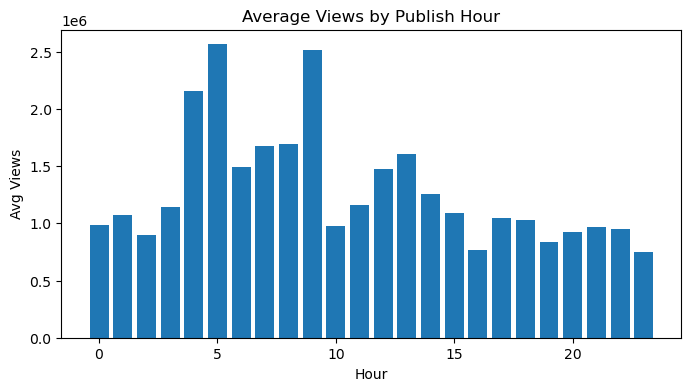

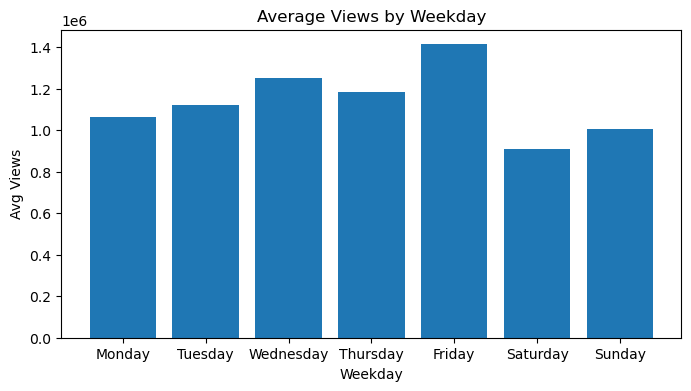

In [172]:
# Step 13: Publish time effects
if 'publish_time' in df_clean.columns:
    df_clean['publish_hour'] = df_clean['publish_time'].dt.hour
    df_clean['publish_weekday'] = df_clean['publish_time'].dt.day_name()

    hour_views = df_clean.groupby('publish_hour')['views'].mean()
    plt.figure(figsize=(8,4))
    plt.bar(hour_views.index, hour_views.values)
    plt.title("Average Views by Publish Hour")
    plt.xlabel("Hour")
    plt.ylabel("Avg Views")
    plt.savefig("fig/views_by_hour.png")
    plt.show()

    weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    weekday_views = df_clean.groupby('publish_weekday')['views'].mean().reindex(weekday_order)
    plt.figure(figsize=(8,4))
    plt.bar(weekday_views.index, weekday_views.values)
    plt.title("Average Views by Weekday")
    plt.xlabel("Weekday")
    plt.ylabel("Avg Views")
    plt.savefig("fig/views_by_weekday.png")
    plt.show()
else:
    print("publish_time column missing.")

In [174]:
# Step 14: Top 10 videos by like ratio
top10_like_ratio = df_clean.sort_values('like_ratio', ascending=False).head(10)
top10_like_ratio[['video_id', 'title', 'views', 'likes', 'like_ratio']]

,video_id,title,views,likes,like_ratio
16999,NV-3s2wwC8c,BlocBoy JB & Drake Look Alive Prod By: Tay Kei...,38441,17318,0.450509
6309,-K9ujx8vO_A,PADMAN Official Trailer | Akshay Kumar | Sonam...,178709,71984,0.402800
4508,u2Ba65YELoo,The Reaction of The Streets (I Wait-Day6 Edition),88889,25599,0.287988
10200,LsoLEjrDogU,Bruno Mars - Finesse (Remix) [Feat. Cardi B] [...,567412,159390,0.280907
17918,2xM0Peo7JNI,Un Film Pour Raphael,6463,1724,0.266749
17708,2xM0Peo7JNI,Un Film Pour Raphael,5232,1377,0.263188
19531,STEUAcTmXTg,[MIXTAPE] I.M - Fly With Me (MV),429082,106915,0.249171
37889,E5yFcdPAGv0,Gorillaz - Humility (Official Video),722936,176713,0.244438
38388,D_6QmL6rExk,BTS (방탄소년단) 'FAKE LOVE' Official MV (Extended ...,5884233,1437903,0.244365
25038,DqihQBYEPas,Il fallait que je vous dise...,4739,1137,0.239924
